<a href="https://colab.research.google.com/github/Bagito999/Deep-Learning/blob/main/The_Machine_Learning_Landscape.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Setup dan import
import sys
assert sys.version_info >= (3, 5)

import sklearn
assert sklearn.__version__ >= "0.20"

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [7]:
# Mengambil data dari GitHub jika perlu
import os
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
datapath = os.path.join("datasets", "lifesat")
os.makedirs(datapath, exist_ok=True)

# Unduh data
import urllib.request
oecd_url = DOWNLOAD_ROOT + "datasets/lifesat/oecd_bli_2015.csv"
gdp_url = DOWNLOAD_ROOT + "datasets/lifesat/gdp_per_capita.csv"

urllib.request.urlretrieve(oecd_url, os.path.join(datapath, "oecd_bli_2015.csv"))
urllib.request.urlretrieve(gdp_url, os.path.join(datapath, "gdp_per_capita.csv"))

('datasets/lifesat/gdp_per_capita.csv',
 <http.client.HTTPMessage at 0x7ee659339b50>)

In [8]:
# Fungsi untuk menyiapkan data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_stats = pd.merge(oecd_bli, gdp_per_capita, left_index=True, right_index=True)
    full_stats.sort_values(by="GDP per capita", inplace=True)
    exclude = [0, 1, 6, 8, 33, 34, 35]
    return full_stats[["GDP per capita", "Life satisfaction"]].drop(full_stats.index[exclude])

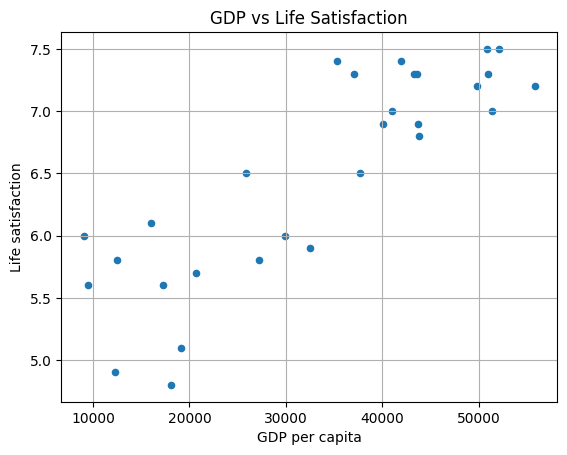

Prediksi: 5.962423376619663


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [9]:
# Load data dan siapkan dataset
oecd_bli = pd.read_csv(os.path.join(datapath, "oecd_bli_2015.csv"), thousands=",")
gdp_per_capita = pd.read_csv(os.path.join(datapath, "gdp_per_capita.csv"), thousands=",", delimiter="\t", encoding="latin1")
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita)

# Visualisasi
country_stats.plot(kind='scatter', x="GDP per capita", y="Life satisfaction")
plt.title("GDP vs Life Satisfaction")
plt.grid(True)
plt.show()

# Model regresi linear sederhana
from sklearn.linear_model import LinearRegression

X = country_stats[["GDP per capita"]]
y = country_stats["Life satisfaction"]

model = LinearRegression()
model.fit(X, y)

# Prediksi untuk negara baru
X_new = [[22587]]  # Contoh GDP
print("Prediksi:", model.predict(X_new)[0])

#  Analisis Regresi Linear: GDP vs Life Satisfaction

## 🔹 Ringkasan Proses

- **Setup dan Import**:
  - Memastikan versi Python ≥ 3.5 dan Scikit-Learn ≥ 0.20.
  - Mengimpor library standar: NumPy, Pandas, Matplotlib, dan modul dari Scikit-Learn.

- **Pengambilan Data**:
  - Data diunduh dari GitHub (OECD BLI 2015 dan GDP per capita tahun 2015).
  - Data disimpan secara lokal dalam folder `datasets/lifesat`.

- **Persiapan Data**:
  - Data OECD difilter untuk hanya mengambil nilai rata-rata (`INEQUALITY == "TOT"`).
  - Data GDP diubah nama kolom dan di-set index berdasarkan negara.
  - Kedua data digabung berdasarkan nama negara.
  - Beberapa negara outlier dihapus untuk menjaga kualitas model.

- **Visualisasi**:
  - Data divisualisasikan menggunakan scatter plot untuk menunjukkan hubungan antara GDP per kapita dan tingkat kepuasan hidup.
  - Terlihat tren positif bahwa semakin tinggi GDP, cenderung semakin tinggi life satisfaction.

- **Pembuatan Model**:
  - Model Regresi Linear sederhana dibuat dengan fitur `GDP per capita` untuk memprediksi `Life satisfaction`.
  - Model dilatih menggunakan data yang sudah dibersihkan.

- **Prediksi**:
  - Model digunakan untuk memprediksi kepuasan hidup suatu negara dengan GDP sebesar **22.587 USD**.
  - **Hasil prediksi life satisfaction**: **≈ 5.96**

##  Kesimpulan

- Terdapat hubungan **linear positif** antara pendapatan per kapita dan tingkat kepuasan hidup di negara-negara OECD.
- Model regresi sederhana mampu memberikan **prediksi yang masuk akal** terhadap life satisfaction berdasarkan GDP.
- Meski sederhana, model ini dapat digunakan untuk estimasi awal, namun hasilnya tidak boleh dijadikan kesimpulan final karena:
  - Tidak mempertimbangkan faktor non-ekonomi.
  - Hanya menggunakan 1 variabel prediktor (`GDP`).
  - Beberapa negara tidak termasuk dalam training karena outlier atau data tidak lengkap.